In [1]:
# Importing libraries
import numpy as np 
import pandas as pd

In [2]:
telco_data = pd.read_csv('/kaggle/input/wa-fnusec-telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_data.shape

(7043, 21)

In [4]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dataset comprises of 7043 rows and 21 attributes. There are no null values in the dataset but the column TotalCharges is wrongly detected as object.

In [7]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')

In [8]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges have 11 Missing values. 

In [10]:
telco_data[telco_data.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


All these observations have zero tenure eventhough the monthly charges are not null. These observations look contradictory.

In [11]:
# lets look at unique values for each column
for column in telco_data.columns:
    print('Column: {} - Unique Values: {}'.format(column, telco_data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

These columns can be categorized into 3 categories

1. Demographic Information
    - gender
    - SeniorCitizen
    - Partner
    - Dependents
2. Customer Account Information
    - tenure
    - Contract
    - PaperlessBilling
    - PaymentMethod
    - MonthlyCharges
    - TotalCharges
3. Services Information
    - PhoneService
    - MultipleLines
    - InternetServices
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies

In [12]:
#Dropping customerID 
telco_data.drop(columns='customerID', inplace=True)

Column: PaymentMethod - Unique Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 the string '(automatic)' is redundant. 

In [13]:
telco_data['PaymentMethod'] = telco_data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [14]:
telco_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

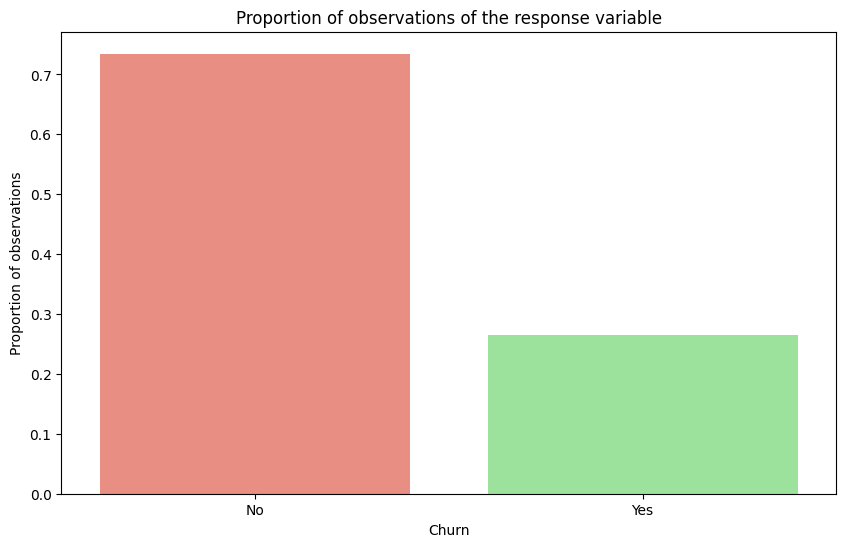

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
churn_response_proportion = telco_data['Churn'].value_counts(normalize=True)
sns.barplot(x=churn_response_proportion.index, y=churn_response_proportion, palette=['salmon', 'lightgreen'])
plt.title("Proportion of observations of the response variable")
plt.xlabel('Churn')
plt.ylabel('Proportion of observations')
plt.show()

the dataset is imbalanced. lets take a look at normalized stacked bar plots for each variable to understand the influence on Churn column

Lets start with demographic information
gender
SeniorCitizen
Partner
Dependents

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

def percentage_stacked_plot(columns_to_plot, super_title, df_telco):
    '''
    Prints a 2x2 grid of 100% stacked plots for the response variable by each column in columns_to_plot.
    Parameters:
        columns_to_plot (list of string): Names of the variables to plot
        super_title (string): Super title of the visualization
        df_telco (DataFrame): The DataFrame containing the data
    Returns:
        None
    '''
    # Set Seaborn style
    sns.set(style="whitegrid")

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

    # Flatten the 2D array of subplots into a 1D array
    axes = axes.flatten()

    # Set super title for the entire figure
    fig.suptitle(super_title, fontsize=22, y=1.02)

    # Loop through each column name to create a subplot
    for index, column in enumerate(columns_to_plot):

        # Calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df_telco[column], df_telco['Churn'], normalize='index') * 100

        # Reset the index to ensure proper alignment
        prop_by_independent.reset_index(inplace=True)

        # Use Seaborn barplot for stacked bar plot
        sns.barplot(x=prop_by_independent.columns[1:], y=prop_by_independent.iloc[:, 1],
                    hue=prop_by_independent[column], ax=axes[index], palette=['springgreen', 'salmon'], dodge=True)

        # Set legend
        axes[index].legend(title='Churn', loc="upper right", bbox_to_anchor=(1.22, 0.5), fancybox=True)

        # Set title and labels
        axes[index].set_title('Proportion of observations by ' + column, fontsize=16)
        axes[index].set_xlabel(column)
        axes[index].set_ylabel('Proportion of observations')

        # Rotate x-axis tick labels
        axes[index].tick_params(axis='x', rotation=0)

        # Remove spines
        sns.despine(ax=axes[index])

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
    plt.show()

# Example usage
# percentage_stacked_plot(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], 'Demographic Information', telco_data)


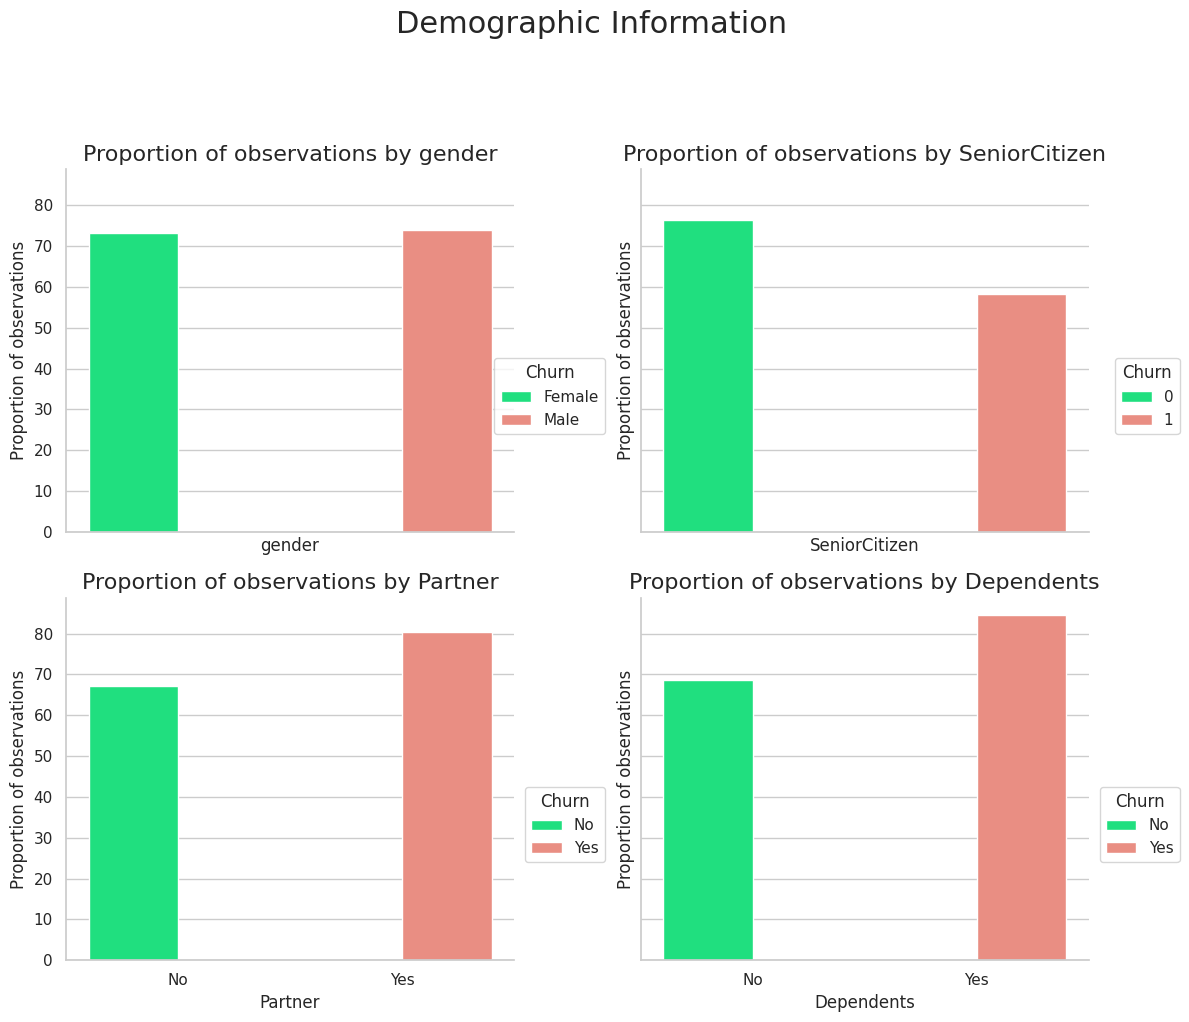

In [18]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information', telco_data)